In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/guess-whos-datasetthe-real-slim-shady-yt-stats/eminem_music_videos.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
time_s={"published_at":"datetime64", "duration":"timedelta64"}
emin_mus_df = pd.read_csv("/kaggle/input/guess-whos-datasetthe-real-slim-shady-yt-stats/eminem_music_videos.csv",
                         parse_dates=["published_at"])
emin_mus_df.duration = emin_mus_df.duration.astype("timedelta64[ns]")

print(emin_mus_df.info())
display(emin_mus_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   title         157 non-null    object             
 1   published_at  157 non-null    datetime64[ns, UTC]
 2   duration      157 non-null    timedelta64[ns]    
 3   view_count    156 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(1), timedelta64[ns](1)
memory usage: 5.0+ KB
None


,title,published_at,duration,view_count
0,Eminem | Fortnite’s The Big Bang Event,2023-12-02 22:57:31+00:00,0 days 00:00:26,1049657.0
1,Eminem Takes the Stage in Fortnite’s The Big B...,2023-12-02 20:15:44+00:00,0 days 00:03:19,4942975.0
2,Eminem - Don’t Front (feat. Buckshot) [Officia...,2023-11-07 17:58:43+00:00,0 days 00:04:45,2711753.0
3,Discombobulated [Official Audio],2023-06-22 01:56:19+00:00,0 days 00:04:13,1889508.0
4,Zeus (feat. White Gold) [Official Audio],2023-06-22 01:55:16+00:00,0 days 00:03:51,2140205.0


In [3]:
print(emin_mus_df.describe())

                        duration    view_count
count                        157  1.560000e+02
mean   0 days 00:04:37.012738853  9.969526e+06
std    0 days 00:10:02.504941859  4.237963e+07
min              0 days 00:00:07  5.331400e+04
25%              0 days 00:01:18  2.605555e+05
50%              0 days 00:03:31  9.156675e+05
75%              0 days 00:05:00  5.602737e+06
max              0 days 02:00:29  4.715030e+08


In [4]:
print(emin_mus_df.published_at.min())
print(emin_mus_df.published_at.max())

2007-05-24 21:50:19+00:00
2023-12-02 22:57:31+00:00


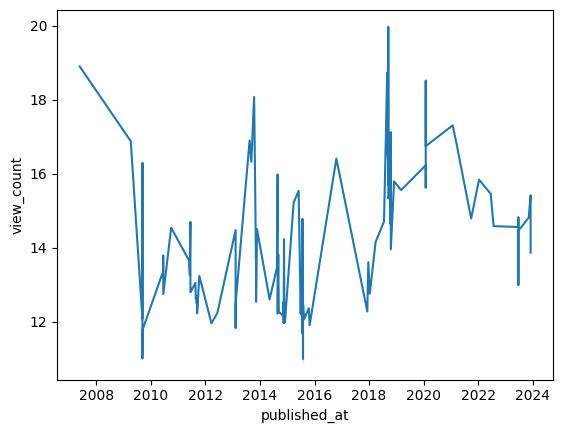

In [5]:
pu_du_vi = sns.lineplot(data=emin_mus_df, x="published_at", y=np.log(emin_mus_df.view_count))

plt.show()

,title,published_at,duration,view_count,type_duration
0,Eminem | Fortnite’s The Big Bang Event,2023-12-02 22:57:31+00:00,0 days 00:00:26,1049657.0,short
1,Eminem Takes the Stage in Fortnite’s The Big B...,2023-12-02 20:15:44+00:00,0 days 00:03:19,4942975.0,medium
2,Eminem - Don’t Front (feat. Buckshot) [Officia...,2023-11-07 17:58:43+00:00,0 days 00:04:45,2711753.0,medium
3,Discombobulated [Official Audio],2023-06-22 01:56:19+00:00,0 days 00:04:13,1889508.0,medium
4,Zeus (feat. White Gold) [Official Audio],2023-06-22 01:55:16+00:00,0 days 00:03:51,2140205.0,medium


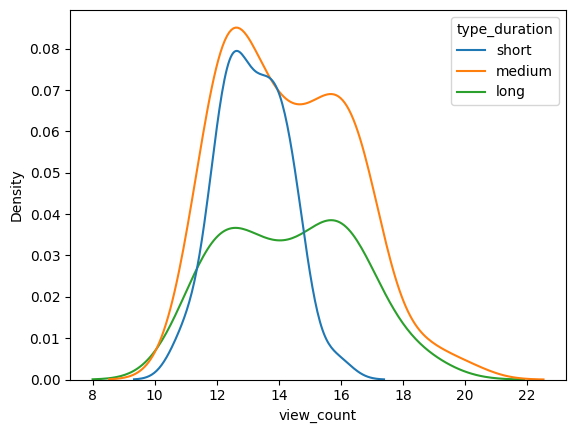

In [6]:
from datetime import timedelta
short = timedelta(days=0, hours=0, minutes=1,seconds=18)
medium = timedelta(days=0, hours=0, minutes=5,seconds=0)
cond = [(emin_mus_df.duration <= short),
        ((emin_mus_df.duration > short)&(emin_mus_df.duration < medium)),
        (emin_mus_df.duration >= medium)]
val=["short", "medium", "long"]

emin_mus_df["type_duration"]= np.select(cond, val)
display(emin_mus_df.head())
du_vi=sns.kdeplot(data=emin_mus_df, x=np.log(emin_mus_df.view_count), hue="type_duration")
plt.show()